# Codigo base

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("PRUEBA.xlsx")
#datos
Lx=1
Ly=4.

#condiciones de frontera
Tagua=503.67 #Temperatura Agua en Rankine
Taire=508.67 #Temperatura Aire en Rankine
Tp=2156.67 #Temperatura Probeta en Rankine

#matriz
Nx=16
Ny=64

#datos de entrada
alpha=190.6/3600 #ft^2/h
dx=(1/16)/12 #ft
dy=(1/16)/12 #ft
dt=(7/16)/3600 #horas
dts=dt*3600 #segundos
beta=(alpha*dt)/dx**2 
k=35 #Btu/h.ft.R
haire=2.39685 #Btu/h.ft^2.R
hagua=1399.66 #Btu/h.ft^2.R


#calculo de nodos
x=np.linspace(0,Lx,Nx)
y=np.linspace(0,Ly,Ny)
xmesh,ymesh=np.meshgrid(x,y,indexing='ij')

#matriz inicial con la temperatura de las probetas
c = np.ones((Ny, Nx))*Tp

#tiempo
J=0
t=0
tfin=dt*1400
Tdt=c.copy()
Tsol=[c]
tsol=[t] 
########
a = np.zeros((7,1401))
datosT = np.zeros((7,819))
dato = 0
bandera = 0
########
while t<tfin:
    #esquina superior izq
    Tdt[0,0]=((2*beta)*((c[0,1])+(c[-Ny+1,0])+(2*((haire*dx)/k)*Taire)))+(((1-(4*beta)-(4*((haire*dx)/k)*beta)))*c[0,0])
    #esquina superior der
    Tdt[0,Nx-1]=((2*beta)*((c[0,Nx-2])+(c[-Ny+1,Nx-1])+(2*((haire*dx)/k)*Taire)))+(((1-(4*beta)-(4*((haire*dx)/k)*beta)))*c[0,Nx-1])
    #esquina inferior der
    Tdt[Ny-1,Nx-1]=((2*beta)*((c[Ny-1,Nx-2])+(c[Ny-2,Nx-1])+(2*((hagua*dx)/k)*Tagua)))+(((1-(4*beta)-(4*((hagua*dx)/k)*beta)))*c[Ny-1,Nx-1])
    #esquina inferior izq
    Tdt[Ny-1,0]=((2*beta)*((c[Ny-1,1])+(c[Ny-2,0])+(2*((hagua*dx)/k)*Tagua)))+(((1-(4*beta)-(4*((hagua*dx)/k)*beta)))*c[Ny-1,0])

    #lado superior
    for i in range (1,Nx-1):
        Tdt[0,i]=(beta*((2*c[1,i])+(c[0,i+1])+(c[0,i-1])+(2*((haire*dx)/k)*Taire)))+(((1-(4*beta)-(2*((haire*dx)/k)*beta)))*c[0,i])
    #lado inferior
    for i in range (1,Nx-1):
        Tdt[Ny-1,i]=(beta*((2*c[Ny-2,i])+(c[Ny-1,i+1])+(c[Ny-1,i-1])+(2*((hagua*dx)/k)*Tagua)))+(((1-(4*beta)-(2*((hagua*dx)/k)*beta)))*c[Ny-1,i])
    #lado izq
    for i in range (1,Ny-1):
        Tdt[i,0]=(beta*((2*c[i,1])+(c[i+1,0])+(c[i-1,0])+(2*((haire*dx)/k)*Taire)))+(((1-(4*beta)-(2*((haire*dx)/k)*beta)))*c[i,0])
    #lado der
    for i in range (1,Ny-1):
        Tdt[i,Nx-1]=(beta*((2*c[i,Nx-2])+(c[i+1,Nx-1])+(c[i-1,Nx-1])+(2*((haire*dx)/k)*Taire)))+(((1-(4*beta)-(2*((haire*dx)/k)*beta)))*c[i,Nx-1])

    #centro
    for i in range (1,Ny-1):
        for j in range (1,Nx-1):
             Tdt[i,j]=(beta*(c[i+1,j]+c[i-1,j]+c[i,j+1]+c[i,j-1]))+((1-(4*beta))*c[i,j])
                

    c=Tdt.copy()
    t=t+dt
    tiempo=t*60
    #Almacenamiento de los datos en los nods en los cuales se localizan los sensores 
    S1=round(7/1.58) 
    S2=round(11/1.58) 
    S3=round(19/1.58) 
    S4=round(25/1.58) 
    S5=round(31/1.58) 
    a[0,bandera]=Tdt[S5,7] 
    a[1,bandera]=Tdt[S4,7] 
    a[2,bandera]=Tdt[S3,7] 
    a[3,bandera]=Tdt[S2,7] 
    a[4,bandera]=Tdt[S1,7]         
    a[5,bandera]=(t-dt)*3600
    bandera = bandera+1
 
        

 #ALMACENAMIENTO DATOS DEL MEDIO   
   
                                     
  
     
   #######################  
    J=J+1              
print(Tdt)
print(tiempo,'minutos')

#POSICION DE SENSORES 
b=df[1,1]
for i in range (0,818):
    datosT[0,i]=0


# Cacharreo

## Importar base de datos


Links de origen

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/prueba_Sebas.csv

raw

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/prueba_Sebas.csv

In [4]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Importar desde Github
df = pd.read_csv('https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/prueba_Sebas.csv')

In [5]:
df.head(3)

,tiempo,temp1,temp2,temp3,temp4,temp5,temp6
0,0.0,951.1,949.4,950.3,950.5,950.0,950.0
1,0.2,939.2,947.5,949.2,949.8,949.6,949.9
2,0.4,927.1,945.5,948.1,949.4,949.1,949.5


In [10]:
df.dtypes

tiempo    float64
temp1     float64
temp2     float64
temp3     float64
temp4     float64
temp5     float64
temp6     float64
dtype: object

In [11]:
df.isnull().sum()

tiempo    0
temp1     0
temp2     0
temp3     0
temp4     0
temp5     0
temp6     0
dtype: int64

In [32]:
df.describe()

,tiempo,temp1,temp2,temp3,temp4,temp5,temp6
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,163.500000,253.305318,437.466198,512.109658,620.730685,668.206357,706.409841
std,94.483367,123.556901,163.675465,166.815023,162.081073,156.293657,148.526694
min,0.000000,128.100000,262.800000,316.700000,402.400000,443.200000,478.000000
25%,81.750000,180.375000,313.400000,378.425000,479.250000,526.825000,568.550000
50%,163.500000,213.150000,382.800000,461.350000,585.200000,644.350000,696.000000
75%,245.250000,259.525000,507.825000,604.500000,748.275000,809.625000,856.850000
max,327.000000,951.100000,949.400000,950.300000,950.500000,950.000000,950.000000


In [33]:
df.shape

(1636, 7)

In [35]:
df.min()

tiempo      0.0
temp1     128.1
temp2     262.8
temp3     316.7
temp4     402.4
temp5     443.2
temp6     478.0
dtype: float64

In [36]:
df.max()

tiempo    327.0
temp1     951.1
temp2     949.4
temp3     950.3
temp4     950.5
temp5     950.0
temp6     950.0
dtype: float64

In [37]:
df.mean()

tiempo    163.500000
temp1     253.305318
temp2     437.466198
temp3     512.109658
temp4     620.730685
temp5     668.206357
temp6     706.409841
dtype: float64

In [45]:
#eje en x 
X = df['tiempo']
#eje en y
Y = df.drop('tiempo',axis=1)


In [ ]:
## Una sola fila

"""
#eje en x 
X = df['tiempo'].head(1)
#eje en y
Y = df.drop('tiempo',axis=1).head(1)
"""

## Una sola columna
"""
#eje en x 
X = df['tiempo'].head(1)
#eje en y
Y = df.df['temp1'].head(1)
"""

In [46]:
print(Y)

      temp1  temp2  temp3  temp4  temp5  temp6
0     951.1  949.4  950.3  950.5  950.0  950.0
1     939.2  947.5  949.2  949.8  949.6  949.9
2     927.1  945.5  948.1  949.4  949.1  949.5
3     915.0  943.8  947.1  948.8  948.8  949.1
4     902.7  941.8  946.0  948.4  948.5  948.9
...     ...    ...    ...    ...    ...    ...
1631  157.7  263.4  317.3  403.1  444.1  478.8
1632  157.5  263.1  317.2  402.9  443.8  478.5
1633  157.6  263.1  317.0  402.6  443.7  478.5
1634  157.3  262.9  316.8  402.6  443.5  478.1
1635  157.4  262.8  316.7  402.4  443.2  478.0

[1636 rows x 6 columns]


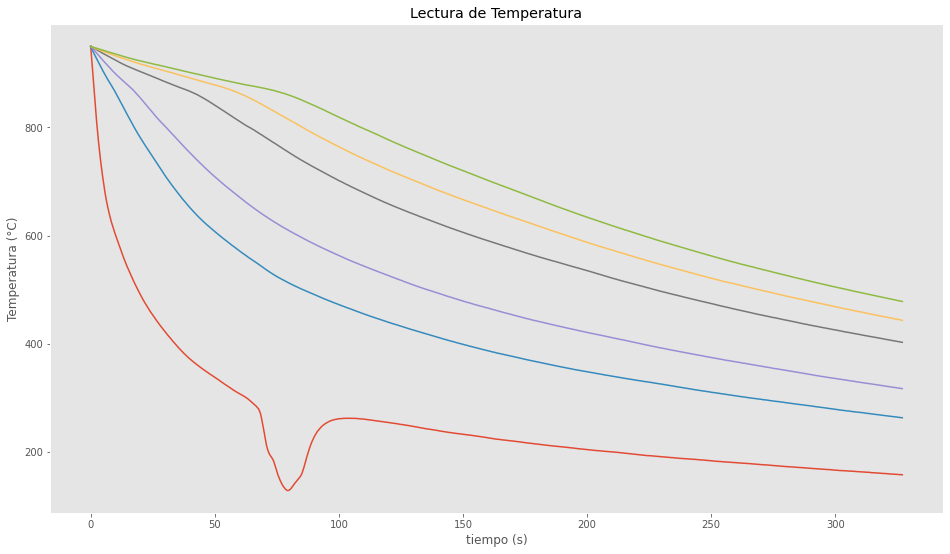

In [47]:
# Graficar
fig, ax = plt.subplots()
ax.plot(X, Y)

ax.set(xlabel='tiempo (s)', ylabel='Temperatura (°C)', title='Lectura de Temperatura')
ax.grid()

fig.savefig("test.png")
plt.show()